In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
import pandas as pd
import numpy as np
from datetime import datetime
import time

import warnings
warnings.filterwarnings("ignore")

In [5]:
!rsync -rv ehsan@arp.ifa.hawaii.edu:~/bar_files ../.

receiving file list ... done
bar_files/
bar_files/100001_basics_bar
bar_files/100002_basics_bar
bar_files/100003_basics_bar
bar_files/100005_basics_bar
bar_files/100006_basics_bar
bar_files/100007_basics_bar
bar_files/100008_basics_bar
bar_files/100014_basics_bar
bar_files/100018_basics_bar
bar_files/100030_basics_bar
bar_files/10Mpc_TRGB_bar
bar_files/10Mpc_TRGB_bar.210920
bar_files/10Mpc_TRGB_bar.210920a
bar_files/10Mpc_TRGB_bar.210920b
bar_files/10Mpc_TRGB_bar.210920~
bar_files/10Mpc_TRGB_bar.210921
bar_files/10Mpc_TRGB_bar.210921b
bar_files/10Mpc_TRGB_bar.211116
bar_files/120002_basics_bar
bar_files/200003_basics_bar
bar_files/200005_basics_bar
bar_files/200006_basics_bar
bar_files/200012_basics_bar
bar_files/200015_basics_bar
bar_files/200016_basics_bar
bar_files/200017_basics_bar
bar_files/200037_basics_bar
bar_files/200045_basics_bar
bar_files/200092_basics_bar
bar_files/2mpp_nostars_nofake_bar
bar_files/2mpp_nostars_nofake_bar.160516
bar_files/2mrs1175_grouped_north_bar
bar_fil

bar_files/FP_CF4_components_bar.220405
bar_files/FP_CF4_components_bar.220521
bar_files/FP_CF4_components_bar.220522.vBrent
bar_files/FP_CF4_components_bar.220522b
bar_files/FP_CF4_components_bar.ehsan220522
bar_files/Flat_GBT_524_bar
bar_files/HI_ba_T_9060_bar~
bar_files/HIprofiles_ave10_bar
bar_files/HIprofiles_ave10a_bar
bar_files/HIprofiles_ave10b_bar
bar_files/HIprofiles_ave11_bar
bar_files/HIprofiles_ave11a_bar
bar_files/HIprofiles_ave11b_bar
bar_files/HIprofiles_ave12_bar
bar_files/HIprofiles_ave12a_bar
bar_files/HIprofiles_ave12b_bar
bar_files/HIprofiles_ave12c_bar
bar_files/HIprofiles_ave12d_bar
bar_files/HIprofiles_ave13_bar
bar_files/HIprofiles_ave13a_bar
bar_files/HIprofiles_ave13b_bar
bar_files/HIprofiles_ave13c_bar
bar_files/HIprofiles_ave13d_bar
bar_files/HIprofiles_ave13e_bar
bar_files/HIprofiles_ave13f_bar
bar_files/HIprofiles_ave14_bar
bar_files/HIprofiles_ave14a_bar
bar_files/HIprofiles_ave14c_bar
bar_files/HIprofiles_ave14d_bar
bar_files/HIprofiles_ave14e_bar
bar_fi

bar_files/TF_CF4_master_bar.200813
bar_files/TF_CF4_master_bar.200824
bar_files/TF_CF4_master_bar.200824a
bar_files/TF_CF4_master_bar.201019
bar_files/TF_CF4_master_bar.201208
bar_files/TF_CF4_master_bar.210324
bar_files/TF_CF4_master_bar.210713
bar_files/TF_calibration_parameters_bar
bar_files/TF_calibration_parameters_bar.190626
bar_files/TF_calibration_parameters_bar.200527
bar_files/TF_calibration_parameters_bar.200604
bar_files/TF_calibration_parameters_bar.200707
bar_files/TF_calibration_parameters_bar.old
bar_files/a100_linkp.32612_bar
bar_files/a100_linkp.32628_bar
bar_files/a100_linkp_bar
bar_files/ahm8689_linked204_bar
bar_files/alf70_candidates_bar
bar_files/allTFR_cf2_bar
bar_files/allTFR_cf2_bar.201209
bar_files/allTFR_cf2_bar.201209a
bar_files/allTFR_cf2_bar.220322
bar_files/allTFR_cf2_bar.220330
bar_files/allTFR_test10_bar
bar_files/allTFR_test11_bar
bar_files/allTFR_test12_bar
bar_files/allTFR_test13_bar
bar_files/allTFR_test14_bar
bar_files/allTFR_test15_bar
bar_files/

bar_files/efar_mn321_277_tables1+2_leda_791_bar
bar_files/ehsan_iter9_23_north_bar
bar_files/ehsan_iter9_23_south_bar
bar_files/ehsan_north_bar
bar_files/ehsan_south_bar
bar_files/ehsan_v31_north_bar
bar_files/ehsan_v31_south_bar
bar_files/enear_dm_bar
bar_files/enearc_aj123_2990_table7_leda_452_bar
bar_files/fisher_958_bar
bar_files/flatgal_bar
bar_files/flatgal_ext2_bar
bar_files/flatgal_ext3_bar
bar_files/flatgal_ext4_bar
bar_files/flatgal_ext5_bar
bar_files/flatgal_ext6_bar
bar_files/flatgal_ext_bar
bar_files/flatgal_ext_bar.220322
bar_files/giovanelli_scI_782_bar
bar_files/glga_2mass_bar
bar_files/glga_2mass_candidates_bar
bar_files/glga_2mass_candidates_bar.220106
bar_files/glga_candidates_bar
bar_files/glga_galex_bar
bar_files/glga_galex_candidates_bar
bar_files/glga_galex_candidates_bar.220106
bar_files/glga_galex_candidates_bar.220106a
bar_files/glga_sdss_bar
bar_files/glga_sdss_candidates_bar
bar_files/glga_sdss_candidates_bar.220106
bar_files/glga_sdss_candidates_bar.220107


bar_files/tempel_sdss0.1_groups_bar.200926
bar_files/tmp
bar_files/trgb_bar.220504
bar_files/trgb_meta_bar
bar_files/trgb_meta_bar.220504
bar_files/trgb_test_bar
bar_files/trgb_test_bar.130313
bar_files/union2_dmlt37_bar
bar_files/v3k_MKlt-21_1288_bar
bar_files/verheijen_table4_78_table2_49_bar
bar_files/w91cl_linked156_bar
bar_files/w91pp_linked381_bar
bar_files/whisp_343_bar
bar_files/wise_6groups_bar
bar_files/wise_bar
bar_files/wnga_cal_bar
bar_files/wnga_cal_bar.131204
bar_files/wnga_cal_bar.150417
bar_files/wnga_phot_snIa_bar
bar_files/wnga_phot_tfc_all_leda_icnt_bar
bar_files/wnga_phot_tfc_all_leda_icnt_bar.131204
bar_files/x
bar_files/zpcal19_bar

sent 22,620 bytes  received 3,894,480,277 bytes  22,841,659.22 bytes/sec
total size is 3,893,926,455  speedup is 1.00


In [6]:
!rsync -rv ehsan@arp.ifa.hawaii.edu:~/catalogs_info.dat* ../bar_files/.

receiving file list ... done
catalogs_info.dat
catalogs_info.dat,210521
catalogs_info.dat,210522
catalogs_info.dat,210522a
catalogs_info.dat.210310
catalogs_info.dat.210315
catalogs_info.dat.210321
catalogs_info.dat.210321a
catalogs_info.dat.210322
catalogs_info.dat.210322a
catalogs_info.dat.210324
catalogs_info.dat.210328
catalogs_info.dat.210328~
catalogs_info.dat.210402
catalogs_info.dat.210508
catalogs_info.dat.210517
catalogs_info.dat.210519
catalogs_info.dat.210524
catalogs_info.dat.210527
catalogs_info.dat.210620
catalogs_info.dat.210713
catalogs_info.dat.210722
catalogs_info.dat.210725
catalogs_info.dat.210803
catalogs_info.dat.210803~
catalogs_info.dat.210818
catalogs_info.dat.210819
catalogs_info.dat.210820
catalogs_info.dat.210824
catalogs_info.dat.210825
catalogs_info.dat.210826
catalogs_info.dat.210905
catalogs_info.dat.210906
catalogs_info.dat.210912
catalogs_info.dat.210912a
catalogs_info.dat.210917
catalogs_info.dat.210920
catalogs_info.dat.210921
catalogs_info.dat.2109

In [80]:
# This function works with both dbtable and the catalog header name on EDD
def get_catal(catal_string, infoFile="../bar_files/catalogs_info.dat"):

    with open(infoFile, "r") as f:
        lines = f.readlines()


        try:
            for i, line in enumerate(lines):
                if catal_string in line:
                    while not "begin" in line:
                        i-=1
                        line = lines[i]
                    while not "filename" in line:
                        i+=1
                        line=lines[i]

                    fname_string = line
                    break
        except: 
            return "", []
            
        catal_columns = []
        
        try:
            while not "column" in line:
                i+=1
                line=lines[i]
            while not 'end' in line:
                catal_columns.append(line.split("=>")[1].split("|")[0].strip())
                i+=1
                line=lines[i]
                
        except:
            print("why")
            return "", []


    catal_file_name = fname_string.split("=>")[1].strip("\n").strip("")
    
    return catal_file_name, catal_columns

In [81]:
catal_dbtable = "kcf4allgroup"
catal_name = "CF4 All Groups"

catal_file_name, catal_columns = get_catal(catal_dbtable)

catal_file_name

'allcf4_group_bar'

In [130]:
catal_columns

data = pd.read_csv(catal_file_name, names=catal_columns, delimiter='|')

data = data.set_index('PGC')

# taking care of empty string
data = data.replace(r'^\s*$', np.nan, regex=True)

data

,DM_av,eDM_av,Vcmb,RA,DE,GLong,GLat,SGL,SGB,DM_SNIa,...,DM_FP,eDM_FP,DM_TFR,eDM_TFR,DM_SBFm,eDM_SBFm,DM_SBFir,eDM_SBFir,DM_SNII,eDM_SNII
PGC,,,,,,,,,,,,,,,,,,,,,
12,35.143,0.41,6179,0.0360,-6.3739,90.1922,-65.9300,286.4249,11.3510,NaN,...,NaN,NaN,34.970,0.410,NaN,NaN,NaN,NaN,NaN,NaN
14,36.243,0.38,11474,359.9805,8.1846,101.6600,-52.5465,300.8070,15.3909,NaN,...,NaN,NaN,36.070,0.380,NaN,NaN,NaN,NaN,NaN,NaN
16,34.803,0.45,5354,0.0470,-5.1587,91.6006,-64.8655,287.6120,11.7030,NaN,...,NaN,NaN,34.630,0.450,NaN,NaN,NaN,NaN,NaN,NaN
55,34.393,0.39,4466,0.1558,33.6010,110.9495,-28.0857,327.0996,19.7763,NaN,...,NaN,NaN,34.220,0.390,NaN,NaN,NaN,NaN,NaN,NaN
63,35.393,0.41,8404,359.9938,28.2883,109.3762,-33.2252,321.4869,19.2652,NaN,...,NaN,NaN,35.220,0.410,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003280,38.000,0.10,26487,204.6025,9.6692,337.5517,69.3203,109.8836,12.9489,38.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9003281,37.630,0.10,21964,170.6241,56.4075,145.3375,56.6814,57.0393,0.9346,37.630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9003283,35.050,0.10,7034,341.2631,8.9422,78.1768,-42.6849,296.8603,33.5664,35.050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat, "DM_"+cat, "eDM_"+cat, "Vcmb_"+cat]

df = df[ss]

ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat]   
df['pgc1'] = df[ss].median(axis=1)
df = df[~df['pgc1'].isna()]

print(len(df))

df.head()

37838


,PGC1_SNIa,DM_SNIa,eDM_SNIa,Vcmb_SNIa,PGC1_FP,DM_FP,eDM_FP,Vcmb_FP,PGC1_TFR,DM_TFR,...,Vcmb_SBFm,PGC1_SBFir,DM_SBFir,eDM_SBFir,Vcmb_SBFir,PGC1_SNII,DM_SNII,eDM_SNII,Vcmb_SNII,pgc1
PGC,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,34.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,36.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,34.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,34.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,35.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [12]:
ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat]   
df['pgc1'] = df[ss].median(axis=1)
df = df[~df['pgc1'].isna()]



d = np.zeros(len(catalogs))
myDict = {}
for i, cat in enumerate(catalogs):
    myDict[cat] = d[i]

for cat in catalogs:
    df['w_'+cat] = 1./df['eDM_'+cat]**2
    df['xw_'+cat] = (df['DM_'+cat]+myDict[cat])*df['w_'+cat]

  
dg = df.groupby("pgc1").agg(["sum", "count"])

for cat in catalogs:
    dg['eDMg_'+cat] = np.sqrt(1./dg['w_'+cat]['sum'])
    dg['DMg_'+cat] = (dg['xw_'+cat]['sum'])/dg['w_'+cat]['sum']

ss = []
for cat in catalogs:
    dg['N_'+cat] = dg["DM_"+cat]['count']
    ss += ['N_'+cat, "DMg_"+cat, "eDMg_"+cat]

dg = dg[ss]
dg.replace([np.inf, -np.inf], np.nan, inplace=True)

dg.index = dg.index.astype('int')


ss = ['DMg_'+cat for cat in catalogs]+['eDMg_'+cat for cat in catalogs]
dg_ = dg[ss]

for cat in catalogs:
        dg_['gw_'+cat] = 1./dg_['eDMg_'+cat]**2

In [13]:
# dg = df.groupby("pgc1").agg(["sum", "count"])
dg

,N_SNIa,DMg_SNIa,eDMg_SNIa,N_FP,DMg_FP,eDMg_FP,N_TFR,DMg_TFR,eDMg_TFR,N_SBFm,DMg_SBFm,eDMg_SBFm,N_SBFir,DMg_SBFir,eDMg_SBFir,N_SNII,DMg_SNII,eDMg_SNII
,,,,,,,,,,,,,,,,,,
pgc1,,,,,,,,,,,,,,,,,,
12,0,NaN,NaN,0,NaN,NaN,1,34.97,0.41,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
14,0,NaN,NaN,0,NaN,NaN,1,36.07,0.38,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
16,0,NaN,NaN,0,NaN,NaN,1,34.63,0.45,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
55,0,NaN,NaN,0,NaN,NaN,1,34.22,0.39,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
63,0,NaN,NaN,0,NaN,NaN,1,35.22,0.41,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003280,1,38.00,0.1,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
9003281,1,37.63,0.1,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [14]:
for col in catalogs[1:]:
    df0 = dg[["DMg_SNIa", "DMg_"+col]].dropna()

    delta = df0.DMg_SNIa - df0["DMg_"+col]

    print(col, np.median(delta))

FP 0.1615000000000002
TFR 0.14999999999999858
SBFm 0.045000000000001705
SBFir 0.10499999999999687
SNII 0.059999999999996945


In [15]:
def GfastChi2(dg, theta=None):
    
    if theta is None:
        d = np.zeros(len(catalogs))
    else:
        theta = np.asarray(theta)
        d = np.concatenate((np.zeros(1), theta[1:]))
    
    myDict = {}
    for i, cat in enumerate(catalogs):
        myDict[cat] = d[i]

    ###########################################################
        
    for cat in catalogs:
#         dg['gw_'+cat] = 1./dg['eDMg_'+cat]**2
        dg['gxw_'+cat] = (dg['DMg_'+cat]+myDict[cat])*dg['gw_'+cat]


    sx = ['gxw_'+cat for cat in catalogs]
    sw = ['gw_'+cat for cat in catalogs]
    
    ERRave2 = 1./dg[sw].sum(axis=1)
    ave = dg[sx].sum(axis=1)*ERRave2
    
    myDict[catalogs[0]] = theta[0]
    for cat in catalogs:
        dg['gxi2_'+cat] = ((dg['DMg_'+cat]+myDict[cat]-ave)**2)/(dg_['eDMg_'+cat]**2+ERRave2)


    sxi = ['gxi2_'+cat for cat in catalogs]    
    XI2 = dg[sxi].sum(axis=1)

    return XI2.sum()

In [16]:
t1 =  datetime.now()

print(GfastChi2(dg_, theta=range(len(catalogs))))

###########################################
t2 =  datetime.now()
print("Execution time:")
print(t2-t1)

38522.138983871984
Execution time:
0:00:00.106660


In [17]:
dg.head()

,N_SNIa,DMg_SNIa,eDMg_SNIa,N_FP,DMg_FP,eDMg_FP,N_TFR,DMg_TFR,eDMg_TFR,N_SBFm,DMg_SBFm,eDMg_SBFm,N_SBFir,DMg_SBFir,eDMg_SBFir,N_SNII,DMg_SNII,eDMg_SNII
,,,,,,,,,,,,,,,,,,
pgc1,,,,,,,,,,,,,,,,,,
12,0,NaN,NaN,0,NaN,NaN,1,34.97,0.41,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
14,0,NaN,NaN,0,NaN,NaN,1,36.07,0.38,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
16,0,NaN,NaN,0,NaN,NaN,1,34.63,0.45,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
55,0,NaN,NaN,0,NaN,NaN,1,34.22,0.39,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
63,0,NaN,NaN,0,NaN,NaN,1,35.22,0.41,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [18]:
df

,PGC1_SNIa,DM_SNIa,eDM_SNIa,Vcmb_SNIa,PGC1_FP,DM_FP,eDM_FP,Vcmb_FP,PGC1_TFR,DM_TFR,...,w_FP,xw_FP,w_TFR,xw_TFR,w_SBFm,xw_SBFm,w_SBFir,xw_SBFir,w_SNII,xw_SNII
PGC,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,34.97,...,NaN,NaN,5.948840,208.030934,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,36.07,...,NaN,NaN,6.925208,249.792244,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,34.63,...,NaN,NaN,4.938272,171.012346,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,34.22,...,NaN,NaN,6.574622,224.983563,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,35.22,...,NaN,NaN,5.948840,209.518144,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003280,9003280.0,38.00,0.1,26487.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9003281,9003281.0,37.63,0.1,21964.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9003283,9003283.0,35.05,0.1,7034.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
len(dg_)

37838

In [20]:
dg_.head()

,DMg_SNIa,DMg_FP,DMg_TFR,DMg_SBFm,DMg_SBFir,DMg_SNII,eDMg_SNIa,eDMg_FP,eDMg_TFR,eDMg_SBFm,...,gxw_TFR,gxw_SBFm,gxw_SBFir,gxw_SNII,gxi2_SNIa,gxi2_FP,gxi2_TFR,gxi2_SBFm,gxi2_SBFir,gxi2_SNII
,,,,,,,,,,,...,,,,,,,,,,
pgc1,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,34.97,NaN,NaN,NaN,NaN,NaN,0.41,NaN,...,219.928614,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
14,NaN,NaN,36.07,NaN,NaN,NaN,NaN,NaN,0.38,NaN,...,263.642659,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
16,NaN,NaN,34.63,NaN,NaN,NaN,NaN,NaN,0.45,NaN,...,180.888889,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
55,NaN,NaN,34.22,NaN,NaN,NaN,NaN,NaN,0.39,NaN,...,238.132807,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
63,NaN,NaN,35.22,NaN,NaN,NaN,NaN,NaN,0.41,NaN,...,221.415824,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [21]:
def lnlike(theta):
    
    xi2 = GfastChi2(dg_, theta=theta)
    
    return -0.5*xi2


def lnprior(theta):
    
    return 0.0


def lnprob(theta):
    
    lp = lnprior(theta)
    if not np.isfinite(lp) :
        return -np.inf    
    return lp + lnlike(theta)

In [22]:
t1 =  datetime.now()
###########################################

ndim, nwalkers = len(catalogs), 128 # 128

p0 = [np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

sampler.reset()
sampler.run_mcmc(p0, 5000) # 5000 for hours
samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))

theta = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                            zip(*np.percentile(samples, 
                            [16, 50, 84],
                            axis=0)))



Execution time:
5:31:39.781839


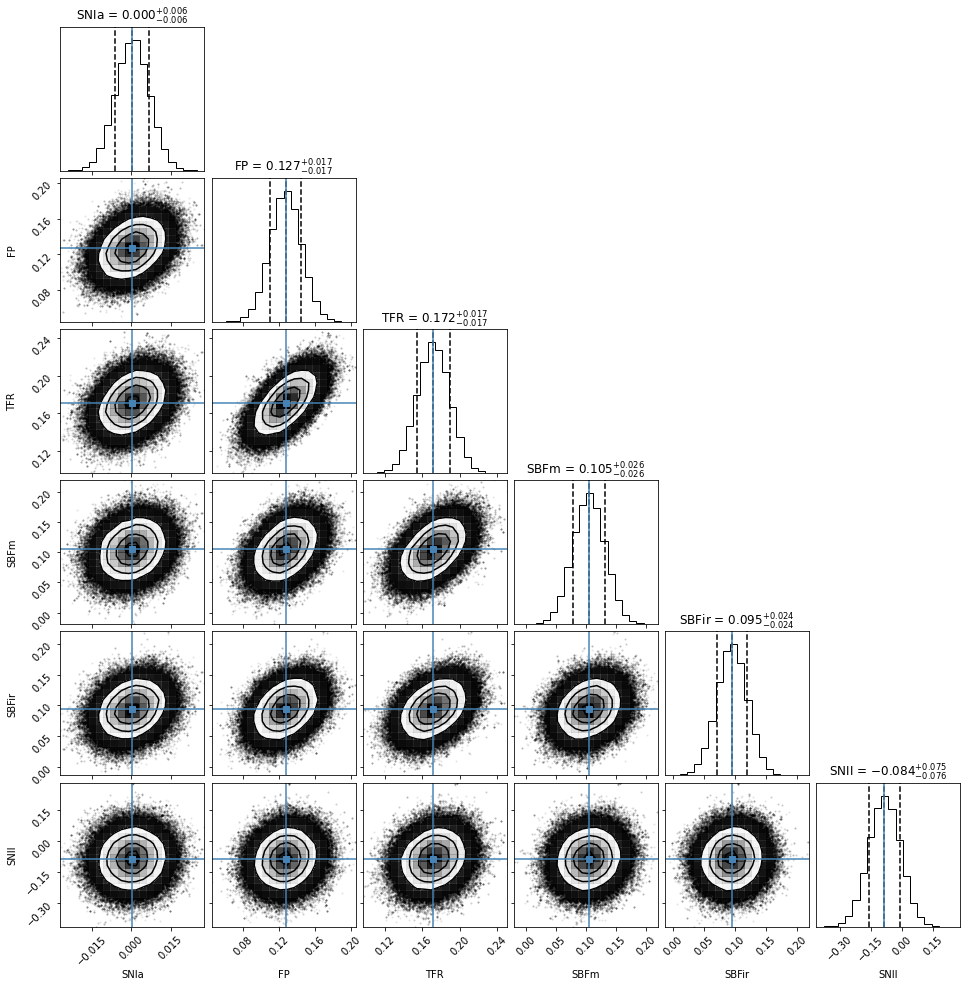

In [23]:
truths=[t[0] for t in theta]
fig = corner.corner(samples, labels=catalogs, 
                    truths=truths, 
                    quantiles=[0.16, 0.5, 0.84], 
                    show_titles=True, 
                    title_kwargs={"fontsize": 12}, 
                    title_fmt=".3f")

###########################################
t2 =  datetime.now()
print("Execution time:")
print(t2-t1)

In [24]:
npzName = "ALL_groups_wo_hc_updatedFP.npz"
np.savez(npzName, samples)
npzfile = np.load(npzName)
print("npz attributes: ", npzfile.files)
NPZsamples = npzfile['arr_0']

npz attributes:  ['arr_0']


In [25]:
mean = np.mean(NPZsamples[:,0])

mean

0.0004153970037102845

In [26]:
NPZsamples[:,0] -= mean

In [27]:
theta = map(lambda v: [v[1], v[2]-v[1], v[1]-v[0]],
                            zip(*np.percentile(NPZsamples, 
                            [16, 50, 84],
                            axis=0)))



theta

In [28]:
labs  = ['SNIa', 'FP', 'TFR', 'SBF_{main}', 'SBF_{ir}', 'SNII']

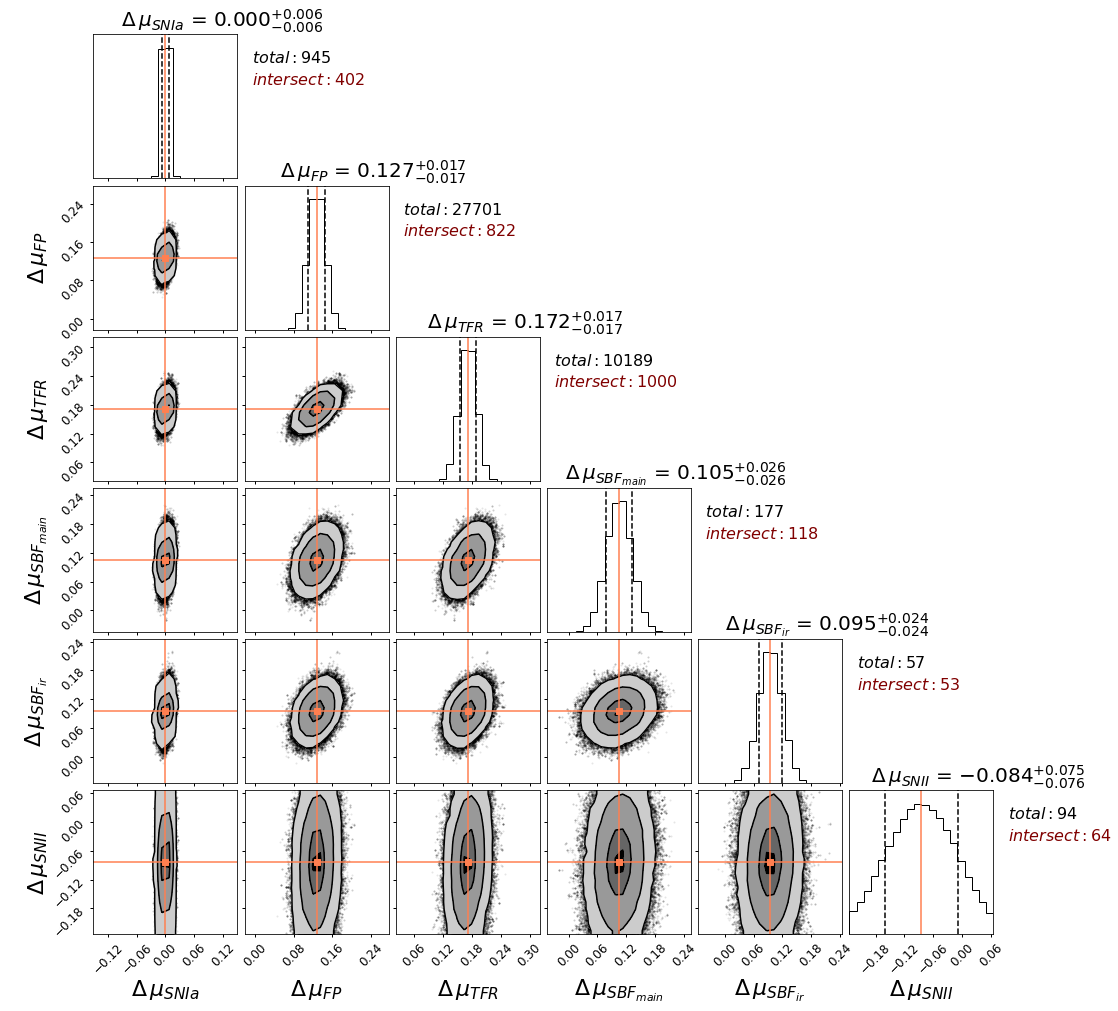

In [29]:
theta = map(lambda v: [v[1], v[2]-v[1], v[1]-v[0]],
                            zip(*np.percentile(NPZsamples, 
                            [16, 50, 84],
                            axis=0)))

truths=[t[0] for t in theta]
truths[0] = 0

labels = ['                  '+r'$\Delta\/ \mu_{'+cat+'}$' for cat in labs] 

fig = corner.corner(NPZsamples, labels=labels, 
                    truths=truths, truth_color='coral',
                    levels=(1-np.exp(-1./8),1-np.exp(-0.5),1-np.exp(-0.5*4),1-np.exp(-0.5*9)),
                    show_titles=True, fill_contours=True, plot_density=True,
                    quantiles=[0.16, 0.84], 
                    scale_hist=False,space=0, 
                    title_kwargs={"fontsize": 20}, 
                    title_fmt=".3f",
                    range=[(t-0.15,t+0.15) for t in truths]
                   )

m = 0 
n_cat = len(catalogs)
i_cat = 0
for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=12)
    
    lbl = ax.xaxis.get_label()
    lbl.set_fontsize(22)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)
    lbl.set_linespacing(50)
    lbl = ax.yaxis.get_label()
    lbl.set_fontsize(22)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)    
    
    
    ax.tick_params(which='major', length=3, width=1., direction='out')
    
    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = -0.1*Xlm[0]+1.1*Xlm[1]
    
    if m%(n_cat+1)==0:
        y0 = 0.2*Ylm[0]+0.80*Ylm[1]
        dx = df[['DM_'+catalogs[i_cat]]].dropna()
        ax.text(x0,y0, r"$total: $"+str(len(dx)), fontsize=16, color='k')
        
        y0 = 0.35*Ylm[0]+0.65*Ylm[1]
        other_DMs = ["DM_"+c for c in catalogs if c != catalogs[i_cat]]
        
        df["sumDM"] = df[other_DMs].sum(axis=1)
        df["sumDM"][df["sumDM"]==0] = np.nan
        
        dx = df[['sumDM', 'DM_'+catalogs[i_cat]]].dropna()
        ax.text(x0,y0, r"$intersect: $"+str(len(dx)), fontsize=16, color='maroon')
        i_cat += 1


    m+=1

